In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
prime_data = pd.read_csv("C:/Users/HP/Downloads/SolarDeploymentDataset.csv")
prime_data.head()


,Region,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score
0,Region_1,6.00,90,23.0,0.39,0.31,0.33
1,Region_2,5.36,206,73.3,0.88,0.35,0.55
2,Region_3,6.15,64,28.3,0.49,0.36,0.57
3,Region_4,7.02,350,53.0,0.22,0.22,0.98
4,Region_5,5.27,114,35.1,0.44,0.37,0.08


In [3]:
prime_data.isnull().sum()
prime_data.describe()
prime_data.info()
prime_data.dtypes
prime_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        50 non-null     object 
 1   Solar_Irradiance_kWh_m2_day   50 non-null     float64
 2   Rural_Pop_Density_per_km2     50 non-null     int64  
 3   Grid_Access_Percent           50 non-null     float64
 4   Infrastructure_Index          50 non-null     float64
 5   Electricity_Cost_USD_per_kWh  50 non-null     float64
 6   Terrain_Ruggedness_Score      50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


(50, 7)

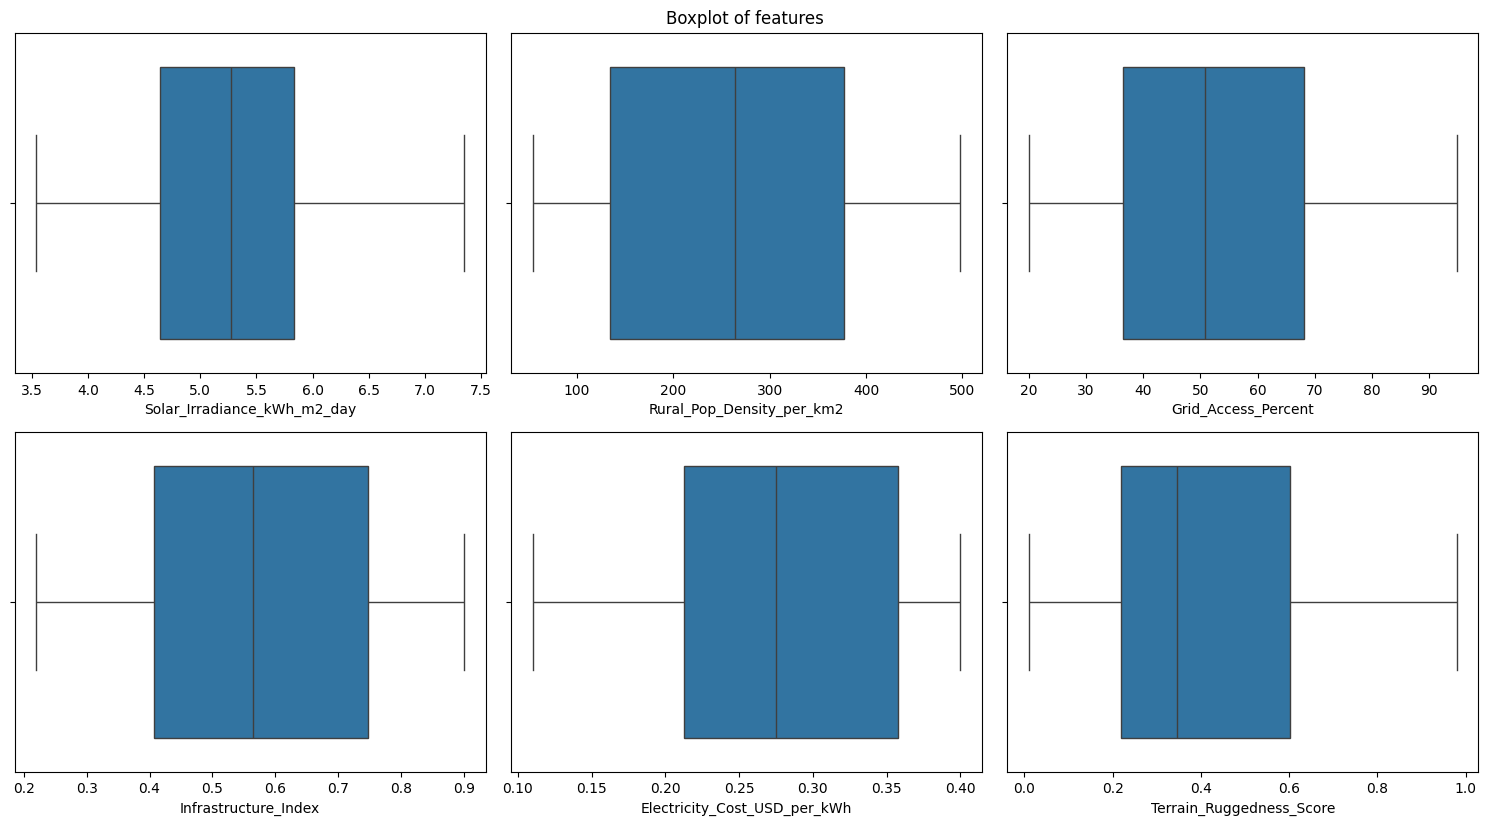

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features = prime_data.columns.drop('Region')
plt.figure(figsize=(15, 12))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=prime_data[col])
    plt.suptitle(f'Boxplot of features')

plt.tight_layout()
plt.show()





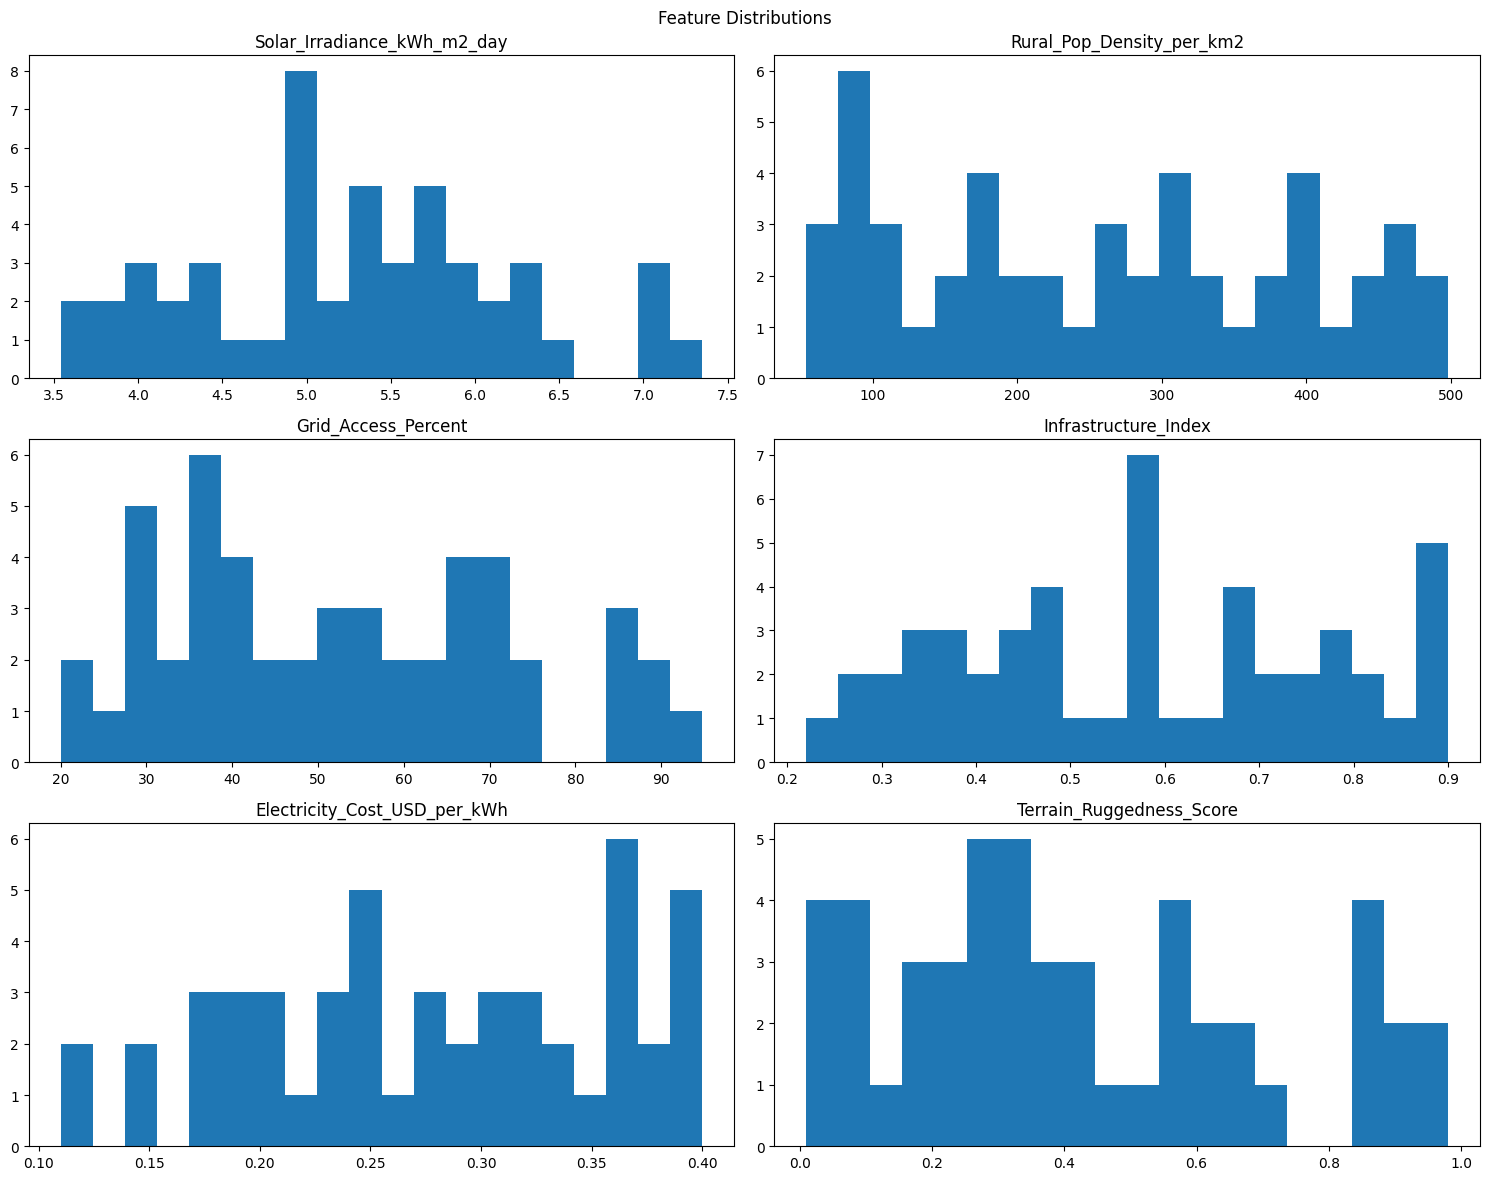

In [8]:
prime_data.drop('Region', axis=1).hist(bins=20, figsize=(15, 12), grid=False)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


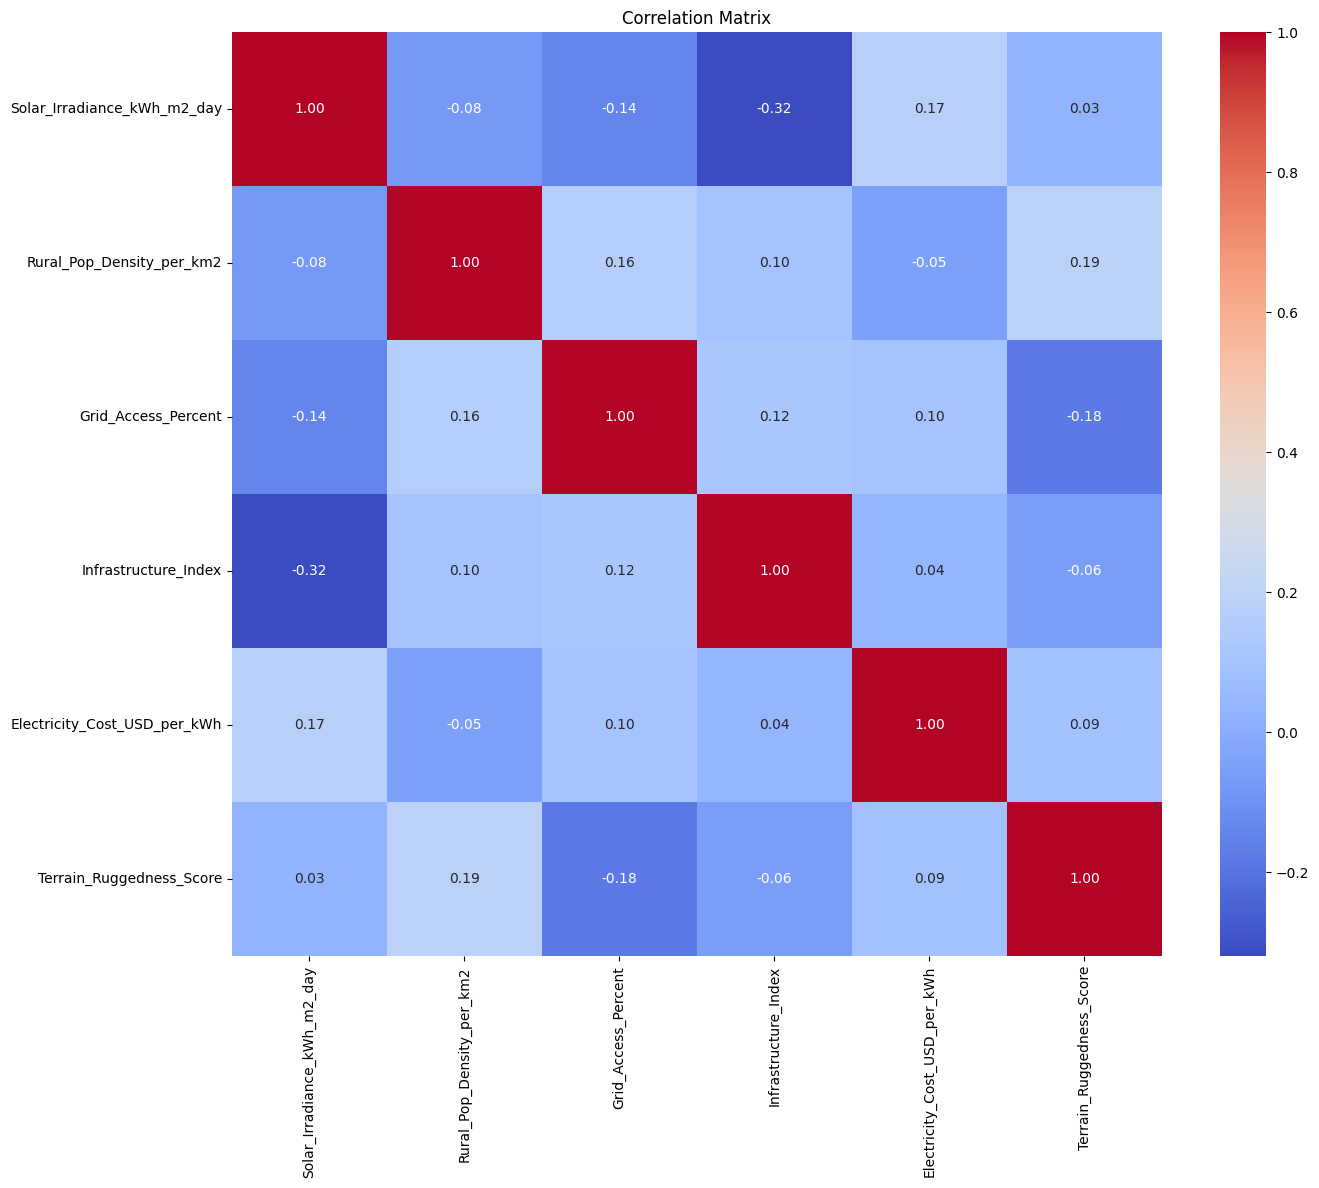

In [6]:
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(prime_data.drop('Region', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()






# Exploratory Data Analysis Report  
### Project: Prime Frontier Solar Deployment Site Selection  
### Task: Assess geographic, environmental, and socio-economic data for solar investment.

---

## 1.Dataset Overview
- **Rows:** 50 regions  
- **Columns:** 7 (Region + 6 features)  
- **No missing values**  
- **Label column:** Region (categorical)

---

## 2. 🔍 Key Features
- Solar Irradiance (kWh/m²/day)  
- Rural Population Density  
- Grid Access (%)  
- Infrastructure Index (0–1)  
- Monthly Electricity Cost (USD/kWh)  
- Terrain Ruggedness Score

---

## 3. 📊 Visual Summary

### Boxplots:
- **Solar Irradiance:** 3.5–7.5 (median ~5.3) — no outliers.
- **Rural Pop. Density:** 100–500 (median ~280) — no outliers.
- **Grid Access:** 20–100% (median ~53%) — no outliers.
- **Infrastructure Index:** 0.2–0.9 (median ~0.55).
- **Electricity Cost:** 0.1–0.4 USD/kWh (median ~0.27).
- **Terrain Ruggedness:** 0–1 (median ~0.35).

### Histograms:
- Solar irradiance: Clusters around 5–6.5, some gaps.
- Rural pop density: Broad spread, no strong peak.
- Grid access: Moderate clustering, gaps.
- Infrastructure index: Peaks around 0.5–0.6.
- Electricity cost: Uneven distribution with local peaks.
- Terrain ruggedness: Spread with gaps and clusters.

---

## 4. Correlation Summary

| Feature Pair | Correlation | Interpretation |
|--------------|-------------|----------------|
| Solar vs Infrastructure | –0.32 | High solar areas lack infrastructure. |
| Solar vs Grid Access | –0.14 | Slight inverse; off-grid opportunities. |
| Solar vs Electricity Cost | +0.17 | Weak positive; potential for ROI. |
| Rural vs Terrain | +0.19 | Rural areas tend to be more rugged. |
| Grid vs Infrastructure | +0.12 | Weak alignment; infrastructure may lag.

---

## 5. 🚩 Top 3 Observations / Red Flags

1. **High Solar Potential but Poor Infrastructure**  
   Solar irradiance negatively correlates with infrastructure (–0.32). Indicates a mismatch between resource and readiness — great opportunity for off-grid deployment.

2. **Electricity Prices Are Uneven**  
   Multiple peaks in pricing show regions with much higher energy costs. These areas are strong candidates for solar investment based on economic urgency.

3. **Terrain and Infrastructure Vary Greatly**  
   Rugged terrain and mid-range infrastructure index may impact installation feasibility. Even with high solar potential, topography must be considered.

---

## Final Note:
This analysis highlights solar-rich regions that lack grid access and face high energy costs — ideal for off-grid or hybrid solar deployment. Terrain and infrastructure must be factored in to assess feasibility for investment.
